In [189]:
import numpy
# 시그모이드 함수 expit() 을 사용하기 위한 scipy.special 임포트
import scipy.special
import matplotlib.pyplot

# 신경망 클래스 정의
class neuralNetwork:

    # 신경망 초기화 함수
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # 신경망 초기화에 필요한 각 변수 설정
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        # 노드 i 외 다음 층의 노드 j 를 연결하는 가중치 w_i_j
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # 학습률 설정
        self.lr = learningrate     

        # 활성화 함수는 시그모이드 함수 사용
        self.activation_function = lambda x : scipy.special.expit(x)

        pass
    
    # 신경망 훈련 함수
    def train(self, inputs_list, targets_list):
        # 리스트를 2차원 행렬로 변환
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T

        # 은닉층 입력값 = 가중치(wih)와 입력값의 행렬곱
        hidden_inputs = numpy.dot(self.wih, inputs)
        # 은닉층으로부터 나오는 신호 계산
        hidden_outputs = self.activation_function(hidden_inputs)

        # 출력층 입력값 = 가중치(who)와 hidden_output 의 행렬곱
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # 출력층으로부터 나오는 신호 계산
        final_outputs = self.activation_function(final_inputs)

        # 최종 오차 = 최종 결과 - 정답(target)
        output_errors = targets - final_outputs

        # 은닉층 오차 = 최종 오차 * 가중치
        hidden_errors = numpy.dot(self.who.T, output_errors)

        # 은닉층과 출력층 사이 가중치 오차 역전파 코드
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))

        # 입력층과 은닉층 사이 가중치 오차 역전파 코드
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        pass
    
    # 신경망 질문 함수
    def query(self, inputs_list):

        # 리스트를 2차원 행렬로 변환
        inputs = numpy.array(inputs_list, ndmin=2).T 

        # 은닉층 입력값 = 가중치(wih)와 입력값의 행렬곱
        hidden_inputs = numpy.dot(self.wih, inputs)
        # 은닉층으로부터 나오는 신호 계산
        hidden_outputs = self.activation_function(hidden_inputs)

        # 출력층 입력값 = 가중치(who)와 hidden_output 의 행렬곱
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # 출력층으로부터 나오는 신호 계산
        final_outputs = self.activation_function(final_inputs)

        return final_outputs
        pass

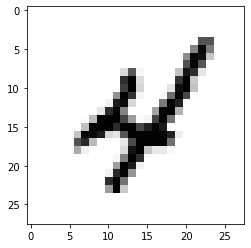

In [190]:
# 입력, 은닉, 출력 노드 수 설정
input_nodes = 784
hidden_nodes = 234
output_nodes = 10

# 학습률 값 설정
learning_rate = 0.54

# 신경망 인스턴스 설정
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# 훈련 데이터 불러오기 & 리스트화
training_data_file = open("C:/Users/anaconda/python/club/m_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

all_values = training_data_list[9].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap = "Greys", interpolation = "None")

In [191]:
# 신경망 훈련

# 훈련 데이터셋을 모두 인식하기
for record in training_data_list:
    # ',' 을 기준으로 각 레코드를 쪼개기
    all_values = record.split(',')
    # 입력값을 0.1 ~ 1.0 사이에 위치하도록 변환
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # 목표 출력값 설정
    targets = numpy.zeros(output_nodes) + 0.01
    # 정답(각 입력 리스트의 0번째 값) 과 출력값 비교
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

In [192]:
# 테스트 데이터 불러오기 & 리스트화
test_data_file = open("C:/Users/anaconda/python/club/m_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [193]:
all_values = test_data_list[0].split(',')
print(all_values[0])

7


In [194]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass

In [195]:
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9395
